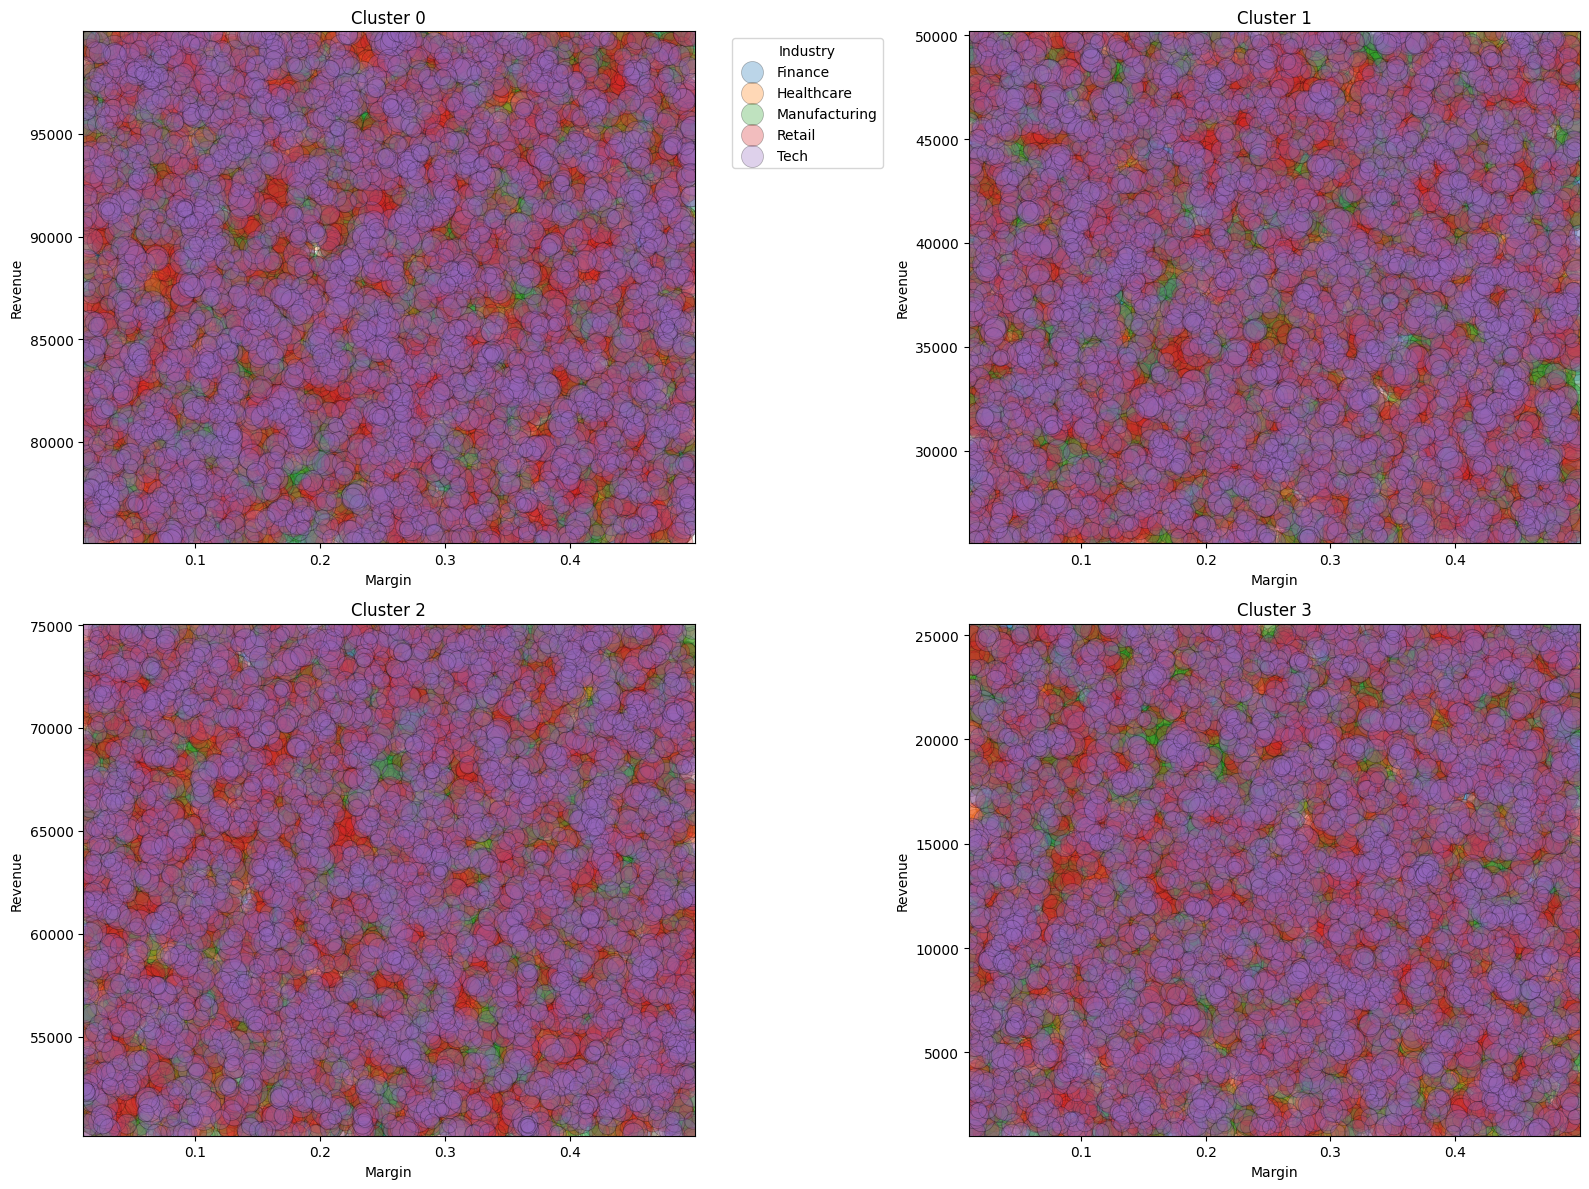

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Generate sample data
np.random.seed(0)
n_customers = 50000
industries = ['Retail', 'Finance', 'Healthcare', 'Tech', 'Manufacturing']

customer_df = pd.DataFrame({
    'margin': np.random.uniform(0.01, 0.5, n_customers),
    'revenue': np.random.uniform(1000, 100000, n_customers),
    'margin_rate': np.random.uniform(0.5, 2.0, n_customers),
    'industry': np.random.choice(industries, n_customers)
})

# Cluster by margin and revenue
kmeans = KMeans(n_clusters=4, random_state=0)
customer_df['cluster'] = kmeans.fit_predict(customer_df[['margin', 'revenue']])

fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=False, sharey=False)
axes = axes.flatten()

industry_list = customer_df['industry'].unique()
colors = plt.cm.tab10(range(len(industry_list)))

for idx, cluster in enumerate(sorted(customer_df['cluster'].unique())):
    ax = axes[idx]
    cluster_df = customer_df[customer_df['cluster'] == cluster]
    for i, industry in enumerate(industry_list):
        subset = cluster_df[cluster_df['industry'] == industry].copy()
        subset = subset.sort_values('margin_rate', ascending=False)
        ax.scatter(
            subset['margin'],
            subset['revenue'],
            s=subset['margin_rate'] * 200,
            alpha=0.3,
            label=industry if idx == 0 else None,
            color=colors[i],
            edgecolors='black',
            linewidth=0.5
        )
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Margin')
    ax.set_ylabel('Revenue')
    # Set axis limits to min/max for this cluster
    if not cluster_df.empty:
        ax.set_xlim(cluster_df['margin'].min(), cluster_df['margin'].max())
        ax.set_ylim(cluster_df['revenue'].min(), cluster_df['revenue'].max())

# Only add legend to the first subplot
axes[0].legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume customer_df is your DataFrame and has a 'cluster' column with 20 unique values

n_clusters = customer_df['cluster'].nunique()
n_cols = 5  # You can adjust this for your preference
n_rows = int(np.ceil(n_clusters / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4), sharex=False, sharey=False)
axes = axes.flatten()

industry_list = customer_df['industry'].unique()
colors = plt.cm.tab20(range(len(industry_list)))  # More colors for more industries

for idx, cluster in enumerate(sorted(customer_df['cluster'].unique())):
    ax = axes[idx]
    cluster_df = customer_df[customer_df['cluster'] == cluster]
    for i, industry in enumerate(industry_list):
        subset = cluster_df[cluster_df['industry'] == industry].copy()
        subset = subset.sort_values('margin_rate', ascending=False)
        if not subset.empty:
            ax.scatter(
                subset['margin'],
                subset['revenue'],
                s=subset['margin_rate'] * 200,
                alpha=0.3,
                label=industry if idx == 0 else None,
                color=colors[i % len(colors)],
                edgecolors='black',
                linewidth=0.5
            )
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Margin')
    ax.set_ylabel('Revenue')
    if not cluster_df.empty:
        ax.set_xlim(cluster_df['margin'].min(), cluster_df['margin'].max())
        ax.set_ylim(cluster_df['revenue'].min(), cluster_df['revenue'].max())

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Only add legend to the first subplot
axes[0].legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()